In [179]:
# iphython options
# delete variables in workspace
%reset -f
#places plots inline
%matplotlib inline 
#automatically reloads modules if they are changed
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Watershed Statistics

Adrian Wiegman | arhwiegman.github.io | adrian.wiegman@usda.gov

Created: 2023-04-05 
Edited: 2023-11-06

Buildnotes: 

- Created function for running shapely additive 

----

## MEP Report Data

The objective of this notebook is to evaulate statistical relationships between watershed attributes and water quality monitoring data for the streams monitored by the [Massachusetts Estuaries Program (MEP) Reports ](https://www.mass.gov/guides/the-massachusetts-estuaries-project-and-reports). 

The MEP reports cover 109 watersheds and 96 stream monitoring locations within the MA southcoast, Cape Cod and the Islands of Martha's Vinyard and Nantucket. Each stream was monitored for at least one year. During monitoring, stage was records with a pressure tranducer, low tide stage discharge relationships were developed, and water samples were collected at least weekly and analyzed for NO3-N and TN. Stream monitoring occured between 1999 and 2007, with over half of monitoring occuring between 2003 and 2006. 

The MEP reports compared measured vs modeled discharge and N loads. Modeled discharge estimates based on watershed area and long term recharge rate. Nitrogen loads were modeled using assumptions about atmospheric deposition and attentuation rates for landcover classes, fertilizer use, the number of housing units, residential water use, wastewater treatment plants, and landfills. 

The table below describes the variables in the MEP report summary dataset [(`data/MEP_SummaryData_Coords.csv`)](data/MEP_SummaryData_Coords.csv).

variable | units | description
---|---|---
`Qmod` | m3/d | modeled discharge (cubic meters per day) using recharge rate and watershed area
`Qmeas` | m3/d | measured discharge based on low tide stage data and stage-discharge relationships
`Qdiff` | % | percent difference between Q measured and Q modeled  $100*(Q_{mod} - Q_{meas})/(Q_{meas})$
`NO3` | mg N/L | mean nitrate + nitrite concentration in samples collected stream water from over the monitoring period
`TN`  | mg N/L | mean total nitrogen concentration in samples collected stream water from over the monitoring period
`Atten` |  %   | estimated nitrogen attenuation based $100*(N_{mod} - N_{meas})/(N_{meas})$
`NO32TN` | ratio | NOX divided by TN
`Yr_Start` | yyyy | year of monitoring start
`Yr_End` | yyyy | year of monitoring end
`Lat` | decimal degrees | lattitude WGS84 of monitoring location
`Lon` | decimal degrees | longitude WGS84 of monitoring location
`Region` | character | Region of MEP report 
`MEP` | character | name of MEP report on Mass.gov
`SiteName` | character | Name of stream monitoring site in MEP report
`Region_MEP` | character | unqiue id string: Region > MEP > SiteName

## MEP Watershed Attributes

The watershed boundaries for the MEP datasets for Martha's Vinyard and Cape Cod were obtained from the capecod commision and from Ed Eichner. Watershed attributes are summarized as percent cover for various landcover and soils datasets.within contributing areas to a given monitoring location. Watershed attributes concatenated from the datasource and class value (e.g. `HYDROLGRP_A` is % cover of Hydrologic Soil Group A within contributing subwatersheds). Watershed attributes are described in detail in the file: `Preprocess_Attributes.ipynb`. 

- numeric columns with no prefix summarize all portions of the contributing subwatersheds
- numeric columns with prefix `GT5` reflect land cover in areas above the 5th percentile elevation in contributing subwatersheds 
- numeric columns with prefix `LE5` summarize land cover in areas at or below the 5th percentile elevation in constributing subs. 

## Statistical Analysis

I will use machine learning methods available `scikit-learn 1.2.2` to predict the MEP variables (`NO3`, `TN`, `NO32TN`, `Atten`, `Qmeas`, `Qdiff`) from watershed attributes. My hypotheses are as follows.

1. NOX will increase as (A) measures of human development increase, and (B) as natural areas capable of attenuating NOX decrease.
2. Atten will decrease with declining natural cover
3. NOX2TN will decrease with increasing natural cover

I will apply the following machine learning techniques and evaluate performance using [shuffle and split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) [k fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) with  [root mean squared error]() as the peformance metric:
1. multiple linear regression with regularization to prevent overfitting 
    
    A. [lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
    
    B. [elastic net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)
    
2. [random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

3. [gradient boosting regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


## Bivariate with NO3
COVERNAME_developed open space exponential - positive
COVERNAME impervious - exponential positive
USE residential single family exponential - positive
USE right of way expoential - positive
USE tax exempt - negative inverse
USE ResComMix - positive
SLOPE_D inverse
GT5_Slope_D inverse
Depth to watertable 0 inverse negative
Farmland of unique importance inverse negative
Not prime farmland logistic/exponential positive
Nleaching high logistic/exponential positive
LE5_ hydrol group A negative 

## References

Gu, Q., Hu, H., Ma, L., Sheng, L., Yang, S., Zhang, X., Zhang, M., Zheng, K., & Chen, L. (2019). Characterizing the spatial variations of the relationship between land use and surface water quality using self-organizing map approach. Ecological Indicators, 102(March), 633–643. https://doi.org/10.1016/j.ecolind.2019.03.017

Lee, C. M., Choi, H., Kim, Y., Kim, M. S., Kim, H. K., & Hamm, S. Y. (2021). Characterizing land use effect on shallow groundwater contamination by using self-organizing map and buffer zone. Science of the Total Environment, 800(3), 149632. https://doi.org/10.1016/j.scitotenv.2021.149632

Feng, Z., Xu, C., Zuo, Y., Luo, X., Wang, L., Chen, H., Xie, X., Yan, D., & Liang, T. (2023). Analysis of water quality indexes and their relationships with vegetation using self-organizing map and geographically and temporally weighted regression. Environmental Research, 216(P2), 114587. https://doi.org/10.1016/j.envres.2022.114587


@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

In [180]:
# this codeblock sets up the environment from jupyter notebooks
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, os, glob, sys, errno
wdr = os.getcwd() 
print("working directory:",wdr)
idr = os.path.join(wdr,'data')
print("input directory:",idr)
odr = os.path.join(wdr,'outputs')
print("output directory:",odr)
scripts = os.path.join(wdr,'scripts')
print("source codes:",scripts)
sys.path.insert(0,scripts) # insert path to directory containing source codes
from functions import *
print("\ntype `fn`+tab to look up user defined functions, \nrun `??fn_{name}` to inspect function source code\n")
fn_hello('Adrian')
print("\nenvironment setup complete")

working directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP
input directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP\data
output directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP\outputs
source codes: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP\scripts

type `fn`+tab to look up user defined functions, 
run `??fn_{name}` to inspect function source code

hello Adrian

environment setup complete


In [181]:
# read the subwatershed attributes table
filename = "df_monitoring_point_sub_attributes_terminus.csv"
_ = pd.read_csv(os.path.join(idr,filename))
_ = _.rename(columns=lambda x: re.sub('\.0','',x))
_ = _.rename(columns=lambda x: re.sub('\s','_',x))
_ = _.rename(columns=lambda x: re.sub('-','_',x))
_ = _.rename(columns=lambda x: re.sub(',','_',x))
#_ = _[_.columns.drop(list(_.filter(regex='DEP2')))]
#_ = _[_.columns.drop(list(_.filter(regex='SLOPE_pct')))]
_.replace([np.inf, -np.inf], np.nan, inplace=True)
_.fillna(0,inplace=True)
print(_.info())
for c in _.columns:
    print(c)
display(_.head())
df_point_sub_atts = _
del _ # clear temporary object from memory

# read the subwatershed monitoring data table
filename = "MEP_SummaryData_Coords.csv"
_ = pd.read_csv(os.path.join(idr,filename))
_.info()

#print()
_ = _[~_['Region_MEP'].isna()]# remove rows with >50% Null
#print(_.shape)
_.dropna(axis=1, thresh = int(0.5*_.shape[0]), inplace=True) # remove columns with >50% Null
#print(_.info())
_.replace([np.inf, -np.inf], np.nan, inplace=True)
#_.fillna(0,inplace=True)
df_monitoring = _
del _ # clear temporary object from memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, FID to LE5_Use_Mix
dtypes: float64(590), int64(1), object(1)
memory usage: 462.6+ KB
None
FID
Region_MEP
Lat
Lon
Shape_Area
SLOPE_
SLOPE_0
SLOPE_A
SLOPE_B
SLOPE_C
SLOPE_D
SLOPE_E
FRMLNDCLS_
FRMLNDCLS_All_areas_are_prime_farmland
FRMLNDCLS_Farmland_of_statewide_importance
FRMLNDCLS_Farmland_of_unique_importance
FRMLNDCLS_Not_prime_farmland
HYDROLGRP_
HYDROLGRP_A
HYDROLGRP_A/D
HYDROLGRP_B
HYDROLGRP_B/D
HYDROLGRP_C
HYDROLGRP_C/D
HYDROLGRP_D
HYDRCRATNG_
HYDRCRATNG_No
HYDRCRATNG_Unranked
HYDRCRATNG_Yes
DRAINCLASS_
DRAINCLASS_Excessively_drained
DRAINCLASS_Moderately_well_drained
DRAINCLASS_Poorly_drained
DRAINCLASS_Somewhat_excessively_drained
DRAINCLASS_Somewhat_poorly_drained
DRAINCLASS_Subaqueous
DRAINCLASS_Very_poorly_drained
DRAINCLASS_Well_drained
DEP2WATTBL_0
DEP2WATTBL_5
DEP2WATTBL_8
DEP2WATTBL_10
DEP2WATTBL_15
DEP2WATTBL_23
DEP2WATTBL_29
DEP2WATTBL_30
DEP2WATTBL_38
DEP2WATTBL_45
DEP2WATTBL_

FID                                  Region_MEP        Lat        Lon  \
0    1    Buzzards Bay > Acushnet > Acushnet River  41.681859 -70.918844   
1    2    Buzzards Bay > Acushnet > Acushnet River  41.681859 -70.918844   
2    3    Buzzards Bay > Acushnet > Acushnet River  41.681859 -70.918844   
3    4    Buzzards Bay > Acushnet > Acushnet River  41.681859 -70.918844   
4    5  Buzzards Bay > Westport > Adamsville Brook  41.553741 -71.126612   

     Shape_Area     SLOPE_   SLOPE_0    SLOPE_A    SLOPE_B   SLOPE_C  ...  \
0  4.510600e+07   0.000000  7.346414  40.006569  41.155998  8.742853  ...   
1  4.510600e+07   0.000000  7.346414  40.006569  41.155998  8.742853  ...   
2  4.510600e+07   0.000000  7.346414  40.006569  41.155998  8.742853  ...   
3  4.510600e+07   0.000000  7.346414  40.006569  41.155998  8.742853  ...   
4  1.489267e+07  51.319207  0.620756  21.203183  25.675601  0.913079  ...   

   LE5_CRANBERRY_0  LE5_CRANBERRY_1  LE5_ACTIVE_0  LE5_ACTIVE_1  LE5_HSG_D  \
0        97.505928         2.494072     97.505928      2.494072  53.576021   
1        97.505928         2.494072     97.505928      2.494072  53.576021   
2        97.505928         2.494072     97.505928      2.494072  53.576021   
3        97.505928         2.494072     97.505928      2.494072  53.576021   
4       100.000000         0.000000    100.000000      0.000000   1.712729   

   LE5_HYDRIC  LE5_NaturalCover  LE5_Use_Res  LE5_Use_ResComMix  LE5_Use_Mix  
0   83.413571         93.312538    22.879596          34.147798    11.253295  
1   83.413571         93.312538    22.879596          34.147798    11.253295  
2   83.413571         93.312538    22.879596          34.147798    11.253295  
3   83.413571         93.312538    22.879596          34.147798    11.253295  
4   13.130529         13.727705     6.391487          16.517127     0.000000  

[5 rows x 592 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idn          109 non-null    int64  
 1   Region_MEP   109 non-null    object 
 2   Region       109 non-null    object 
 3   MEP          109 non-null    object 
 4   SiteName     99 non-null     object 
 5   Lat          98 non-null     object 
 6   Lon          98 non-null     float64
 7   Yr_Start     96 non-null     float64
 8   Yr_End       96 non-null     float64
 9   Dates        96 non-null     object 
 10  Pond_Atten   92 non-null     object 
 11  Qmeas        96 non-null     float64
 12  Qmod         95 non-null     float64
 13  Qdiff        96 non-null     float64
 14  NO3          96 non-null     float64
 15  NH4          16 non-null     object 
 16  TN           96 non-null     float64
 17  NO32TN       96 non-null     float64
 18  Atten        94 non-null     float64
 19  Notes   

In [182]:
# clean up the monitoring data.
#print(df_monitoring.replace(to_replace=r'//', value='', regex=True))
#df_monitoring.rename(columns={'Pond/Stream N Atten. Meas. (%)':'Atten (%)'},inplace=True)
#df_monitoring['Atten (%)'] = pd.to_numeric(df_monitoring['Atten (%)'])
#print(df_monitoring.info())

# add weights of observations based on year of monitoring
df_monitoring['n'] = 1
_ = df_monitoring[["Region_MEP","n"]].dropna().groupby('Region_MEP').aggregate(sum)
df_monitoring.merge(_,on="Region_MEP")
df_monitoring['wt'] = 1/df_monitoring['n']  # make observation wieghts based on monitoring years.
df_monitoring.head()
# select columns to retain for analysis
selected_monitoring_cols = ['NO32TN','TN','Qmeas','Qdiff','NO3','Atten']
grps = ['Region_MEP']

# calculate mean value for all monitoring years at a given station
df_monitoring_avg = df_monitoring.groupby(grps)[selected_monitoring_cols].aggregate(np.mean)
df_monitoring_avg['Yr_Start'] = df_monitoring.groupby(grps)['Yr_Start'].aggregate(np.min)
df_monitoring_avg['Yr_End'] = df_monitoring.groupby(grps)['Yr_End'].aggregate(np.max)
df_monitoring_avg = df_monitoring_avg.assign(Year = (df_monitoring_avg.Yr_Start+df_monitoring_avg['Yr_End'])/2)
df_monitoring_avg.info()
df_monitoring_avg.to_csv(os.path.join(odr,"MEP_SummaryData_Coords_Avg.csv"))

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, Buzzards Bay > Acushnet > Acushnet River to Islands > Tisbury  > Tiasquam River
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO32TN    93 non-null     float64
 1   TN        93 non-null     float64
 2   Qmeas     93 non-null     float64
 3   Qdiff     93 non-null     float64
 4   NO3       93 non-null     float64
 5   Atten     91 non-null     float64
 6   Yr_Start  93 non-null     float64
 7   Yr_End    93 non-null     float64
 8   Year      93 non-null     float64
dtypes: float64(9)
memory usage: 8.3+ KB


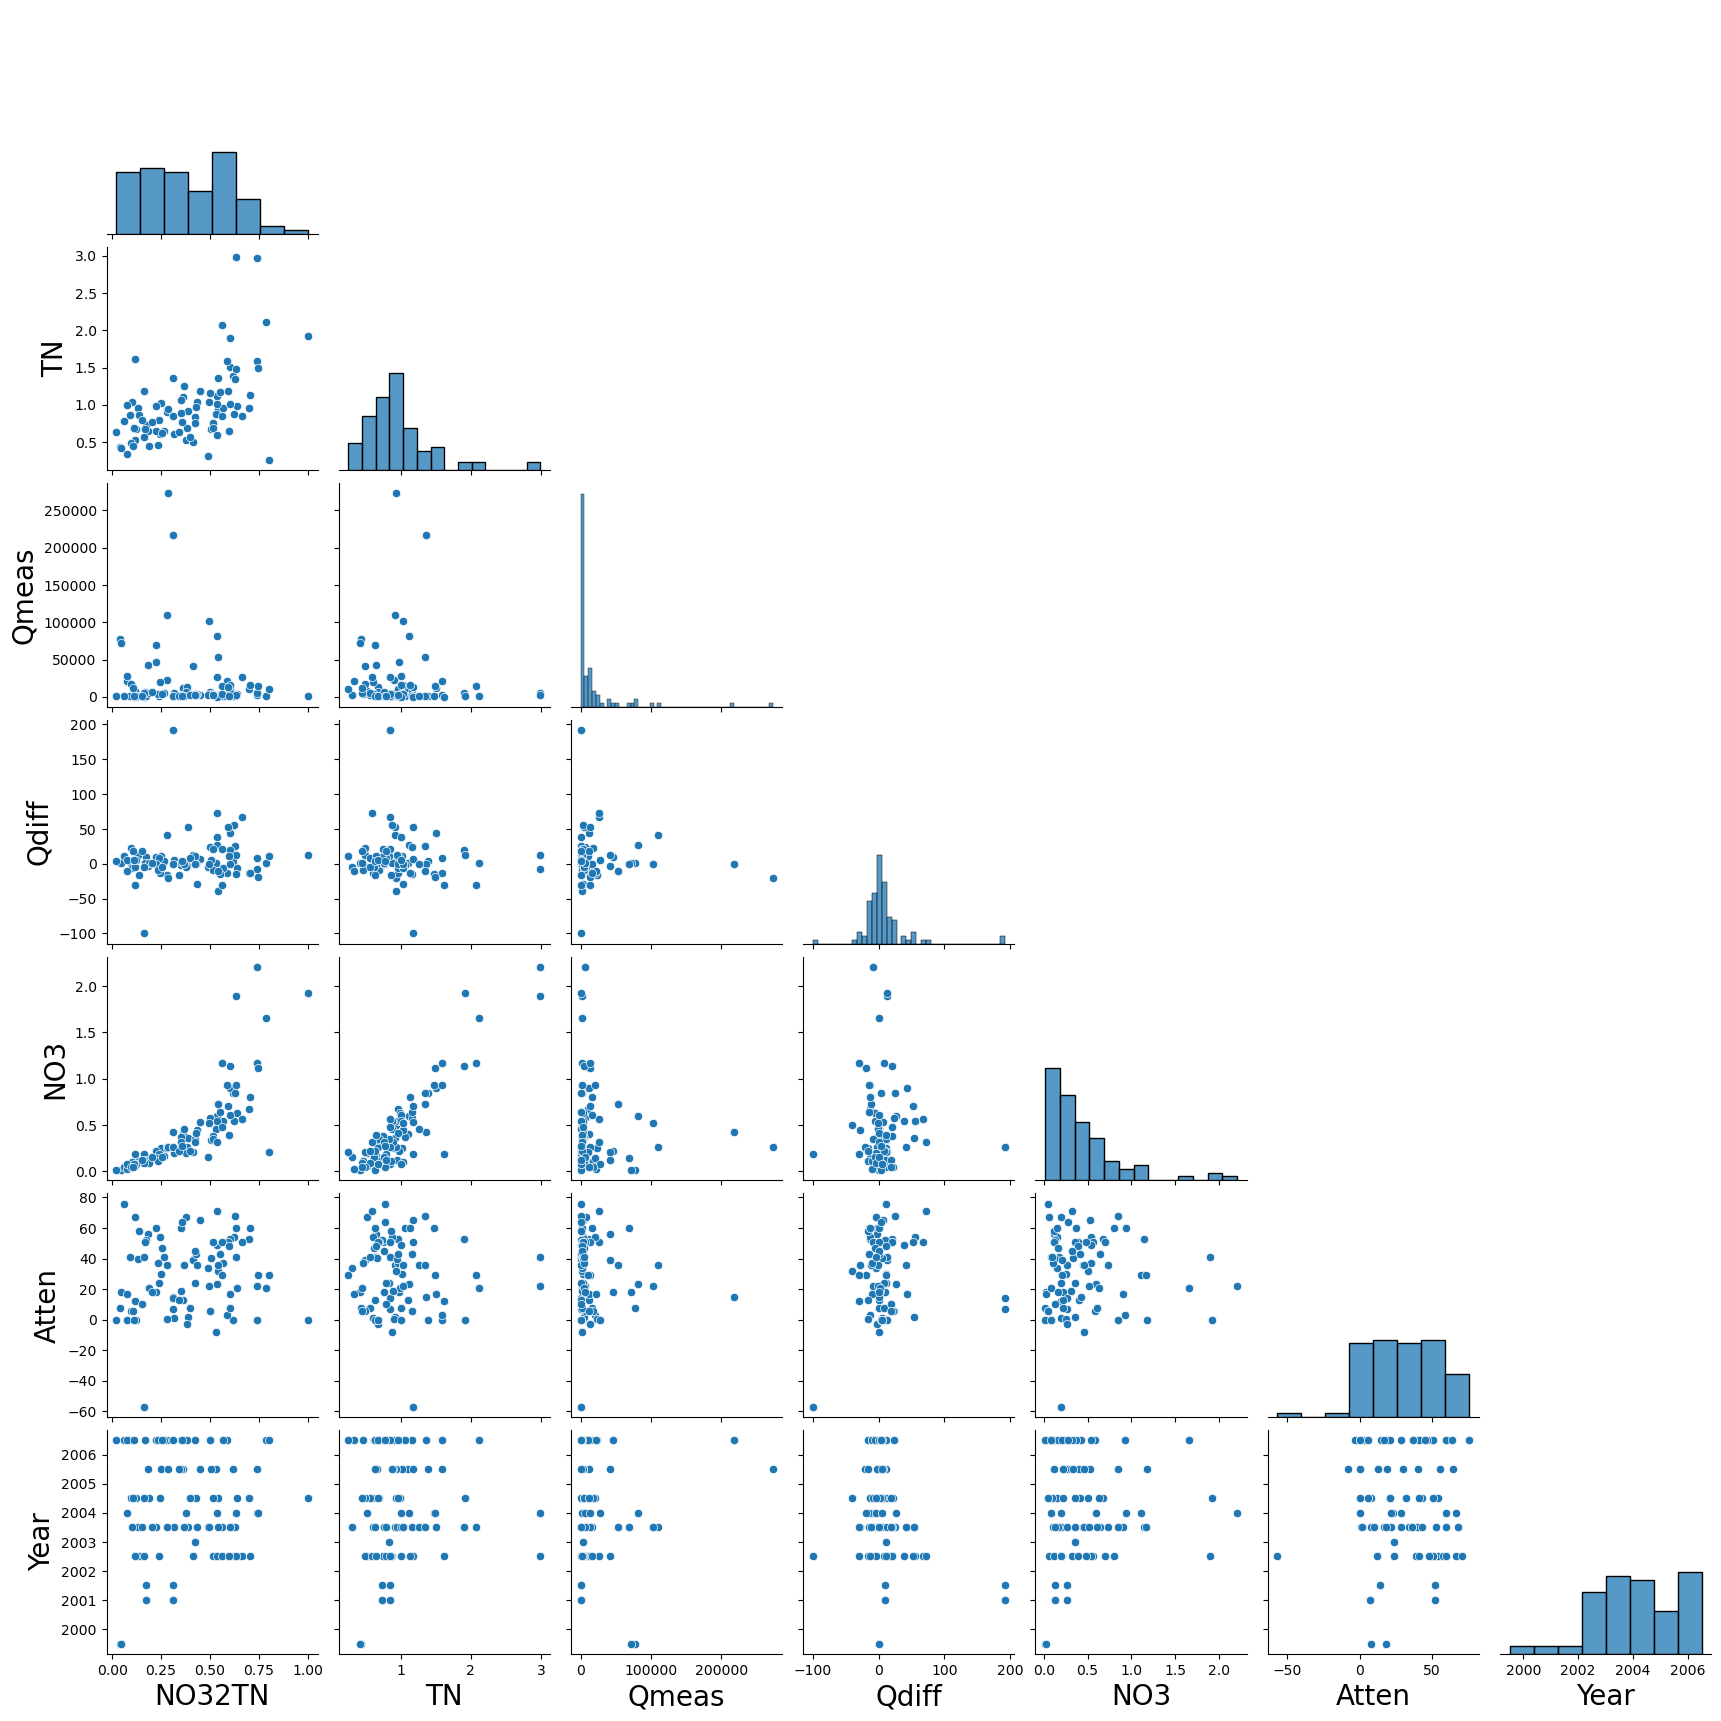

In [183]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df_monitoring_avg.drop(['Yr_Start','Yr_End'],axis=1),
             corner=True) # show only lower triangle

In [184]:
#join the data
df_monitoring_watershed = df_monitoring_avg.merge(df_point_sub_atts.drop('FID',axis=1),how='left',on="Region_MEP")
df = df_monitoring_watershed # make alias
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(0,inplace=True)
#df.set_index(['Region_MEP'],inplace=True)
df.info()
df.to_csv(os.path.join(odr,'df_MEP_Monitoring_Avg_Geo_Merge.csv'),index=False)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 107
Columns: 600 entries, Region_MEP to LE5_Use_Mix
dtypes: float64(599), object(1)
memory usage: 422.6+ KB
Index(['Region_MEP', 'NO32TN', 'TN', 'Qmeas', 'Qdiff', 'NO3', 'Atten',
       'Yr_Start', 'Yr_End', 'Year',
       ...
       'LE5_CRANBERRY_0', 'LE5_CRANBERRY_1', 'LE5_ACTIVE_0', 'LE5_ACTIVE_1',
       'LE5_HSG_D', 'LE5_HYDRIC', 'LE5_NaturalCover', 'LE5_Use_Res',
       'LE5_Use_ResComMix', 'LE5_Use_Mix'],
      dtype='object', length=600)


In [185]:
# univariate analysis
df_summary = df.describe().T
df_summary.to_csv(os.path.join(odr,'df_summary.csv'))
df_summary

count          mean           std         min          25%  \
NO32TN              90.0      0.403491      0.214913    0.020376     0.226936   
TN                  90.0      0.992978      0.483595    0.258000     0.677750   
Qmeas               90.0  18673.775297  33856.510248   97.000000  1403.500000   
Qdiff               90.0      8.995811     35.947742 -100.000000    -5.070710   
NO3                 90.0      0.455427      0.429909    0.013000     0.152500   
...                  ...           ...           ...         ...          ...   
LE5_HYDRIC          90.0     61.018698     28.942819    0.000000    36.627118   
LE5_NaturalCover    90.0     83.241338     23.866110    0.822193    82.359013   
LE5_Use_Res         90.0     24.685466     28.281314    0.000000     3.265415   
LE5_Use_ResComMix   90.0     28.640612     28.566186    0.000000     4.273500   
LE5_Use_Mix         90.0      2.048978      5.595689    0.000000     0.000000   

                           50%           75%            max  
NO32TN                0.403984      0.559183       1.000000  
TN                    0.912500      1.131375       2.988000  
Qmeas              4203.000000  15982.000000  217352.276700  
Qdiff                 3.208602     12.509533     191.676436  
NO3                   0.344000      0.597500       2.207000  
...                        ...           ...            ...  
LE5_HYDRIC           69.906452     83.783666      98.312921  
LE5_NaturalCover     92.822236     98.656012     100.000000  
LE5_Use_Res          12.557533     37.903274      99.949538  
LE5_Use_ResComMix    17.130482     46.177103      99.949538  
LE5_Use_Mix           0.000000      0.034652      38.476977  

[599 rows x 8 columns]

In [186]:
for i in df.index:
    print(i)
    print("index: ",i,"  MEP id: ",df.Region_MEP[i])

0
index:  0   MEP id:  Buzzards Bay > Acushnet > Acushnet River
1
index:  1   MEP id:  Buzzards Bay > Acushnet > Acushnet River
2
index:  2   MEP id:  Buzzards Bay > Acushnet > Acushnet River
3
index:  3   MEP id:  Buzzards Bay > Acushnet > Acushnet River
4
index:  4   MEP id:  Buzzards Bay > Acushnet > Acushnet River
5
index:  5   MEP id:  Buzzards Bay > Nasketucket > Nasketucket River 1
6
index:  6   MEP id:  Buzzards Bay > Nasketucket > Nasketucket River 2
7
index:  7   MEP id:  Buzzards Bay > Nasketucket > Nonquit Brook
8
index:  8   MEP id:  Buzzards Bay > Nasketucket > Shaws Cove Stream
9
index:  9   MEP id:  Buzzards Bay > Slocums > Barneys Joy Creek
10
index:  10   MEP id:  Buzzards Bay > Slocums > Destruction Brook
11
index:  11   MEP id:  Buzzards Bay > Slocums > Giles Creek
12
index:  12   MEP id:  Buzzards Bay > Slocums > Paskamansett River
13
index:  13   MEP id:  Buzzards Bay > Wareham > Agawam River
14
index:  14   MEP id:  Buzzards Bay > Wareham > Wankinco River
15
inde

In [187]:
selected = ['Shape_Area',
            'HYDRCRATNG_No',
            'COVERNAME_Water','HSG_D','HYDRIC',
            'SLOPE_0','SLOPE_A',
            'NaturalCover','USEGENNAME_Commercial',
            'ACTIVE_1',
            #'NLEACHING_Low',
'COVERNAME_Developed_Open_Space', # positive
'COVERNAME_Impervious', # exponential positive
'USEGENNAME_Residential___single_family', # exponential - positive
'USEGENNAME_Right_of_way', # positive
'USEGENNAME_Tax_exempt', # negative inverse
'Use_ResComMix', # positive
'SLOPE_D', # inverse, slope D is steep slopes betwee 15-25% grade
'DEP2WATTBL_0', # inverse negative
'FRMLNDCLS_Not_prime_farmland', # logistic/exponential positive
#'NLEACHING_High', # logistic/exponential positive
'HYDROLGRP_A', # negative 
           ]

selected_le5 = ["LE5_"+i for i in selected]
selected_gt5 = ["GT5_"+i for i in selected]

selected_watershed_features = selected
#selected_watershed_features = selected_le5 + selected_gt5

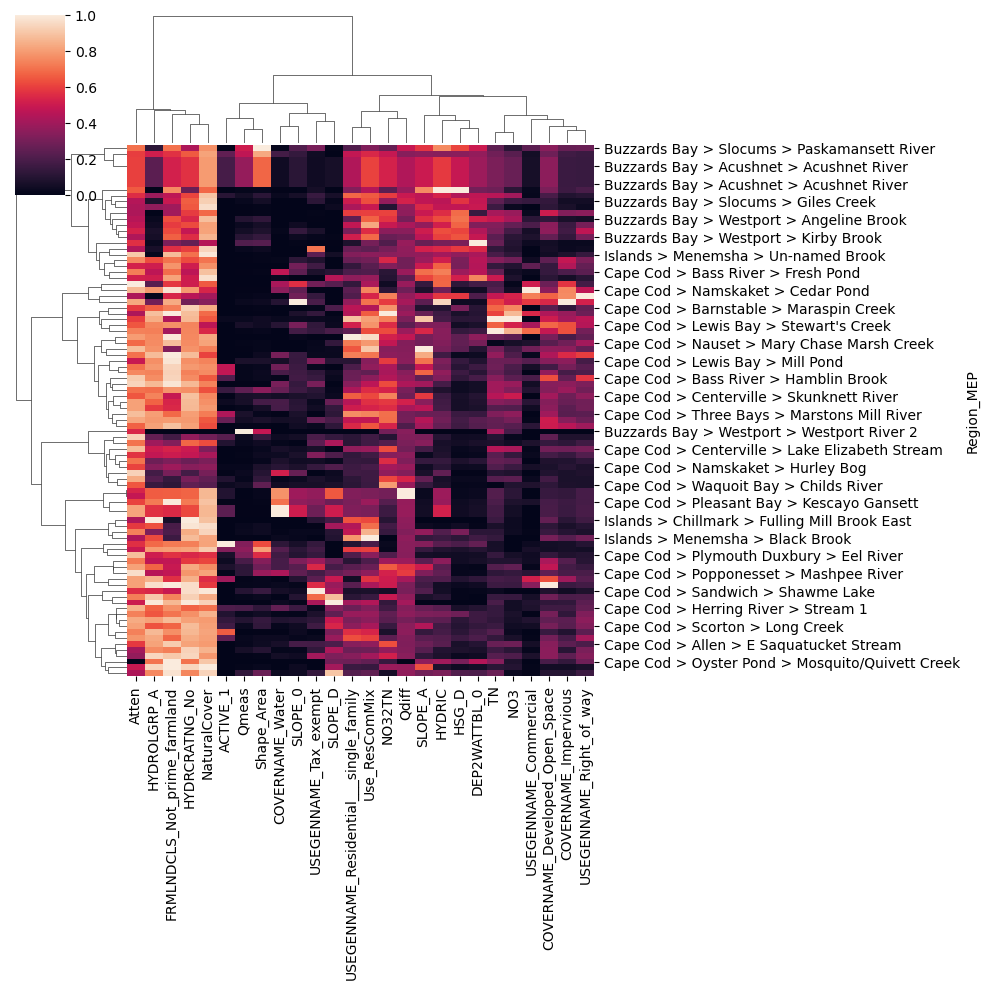

In [188]:
sns.clustermap(df[selected_monitoring_cols+selected_watershed_features].set_index(df['Region_MEP']),standard_scale=1,metric="euclidean",method='ward')

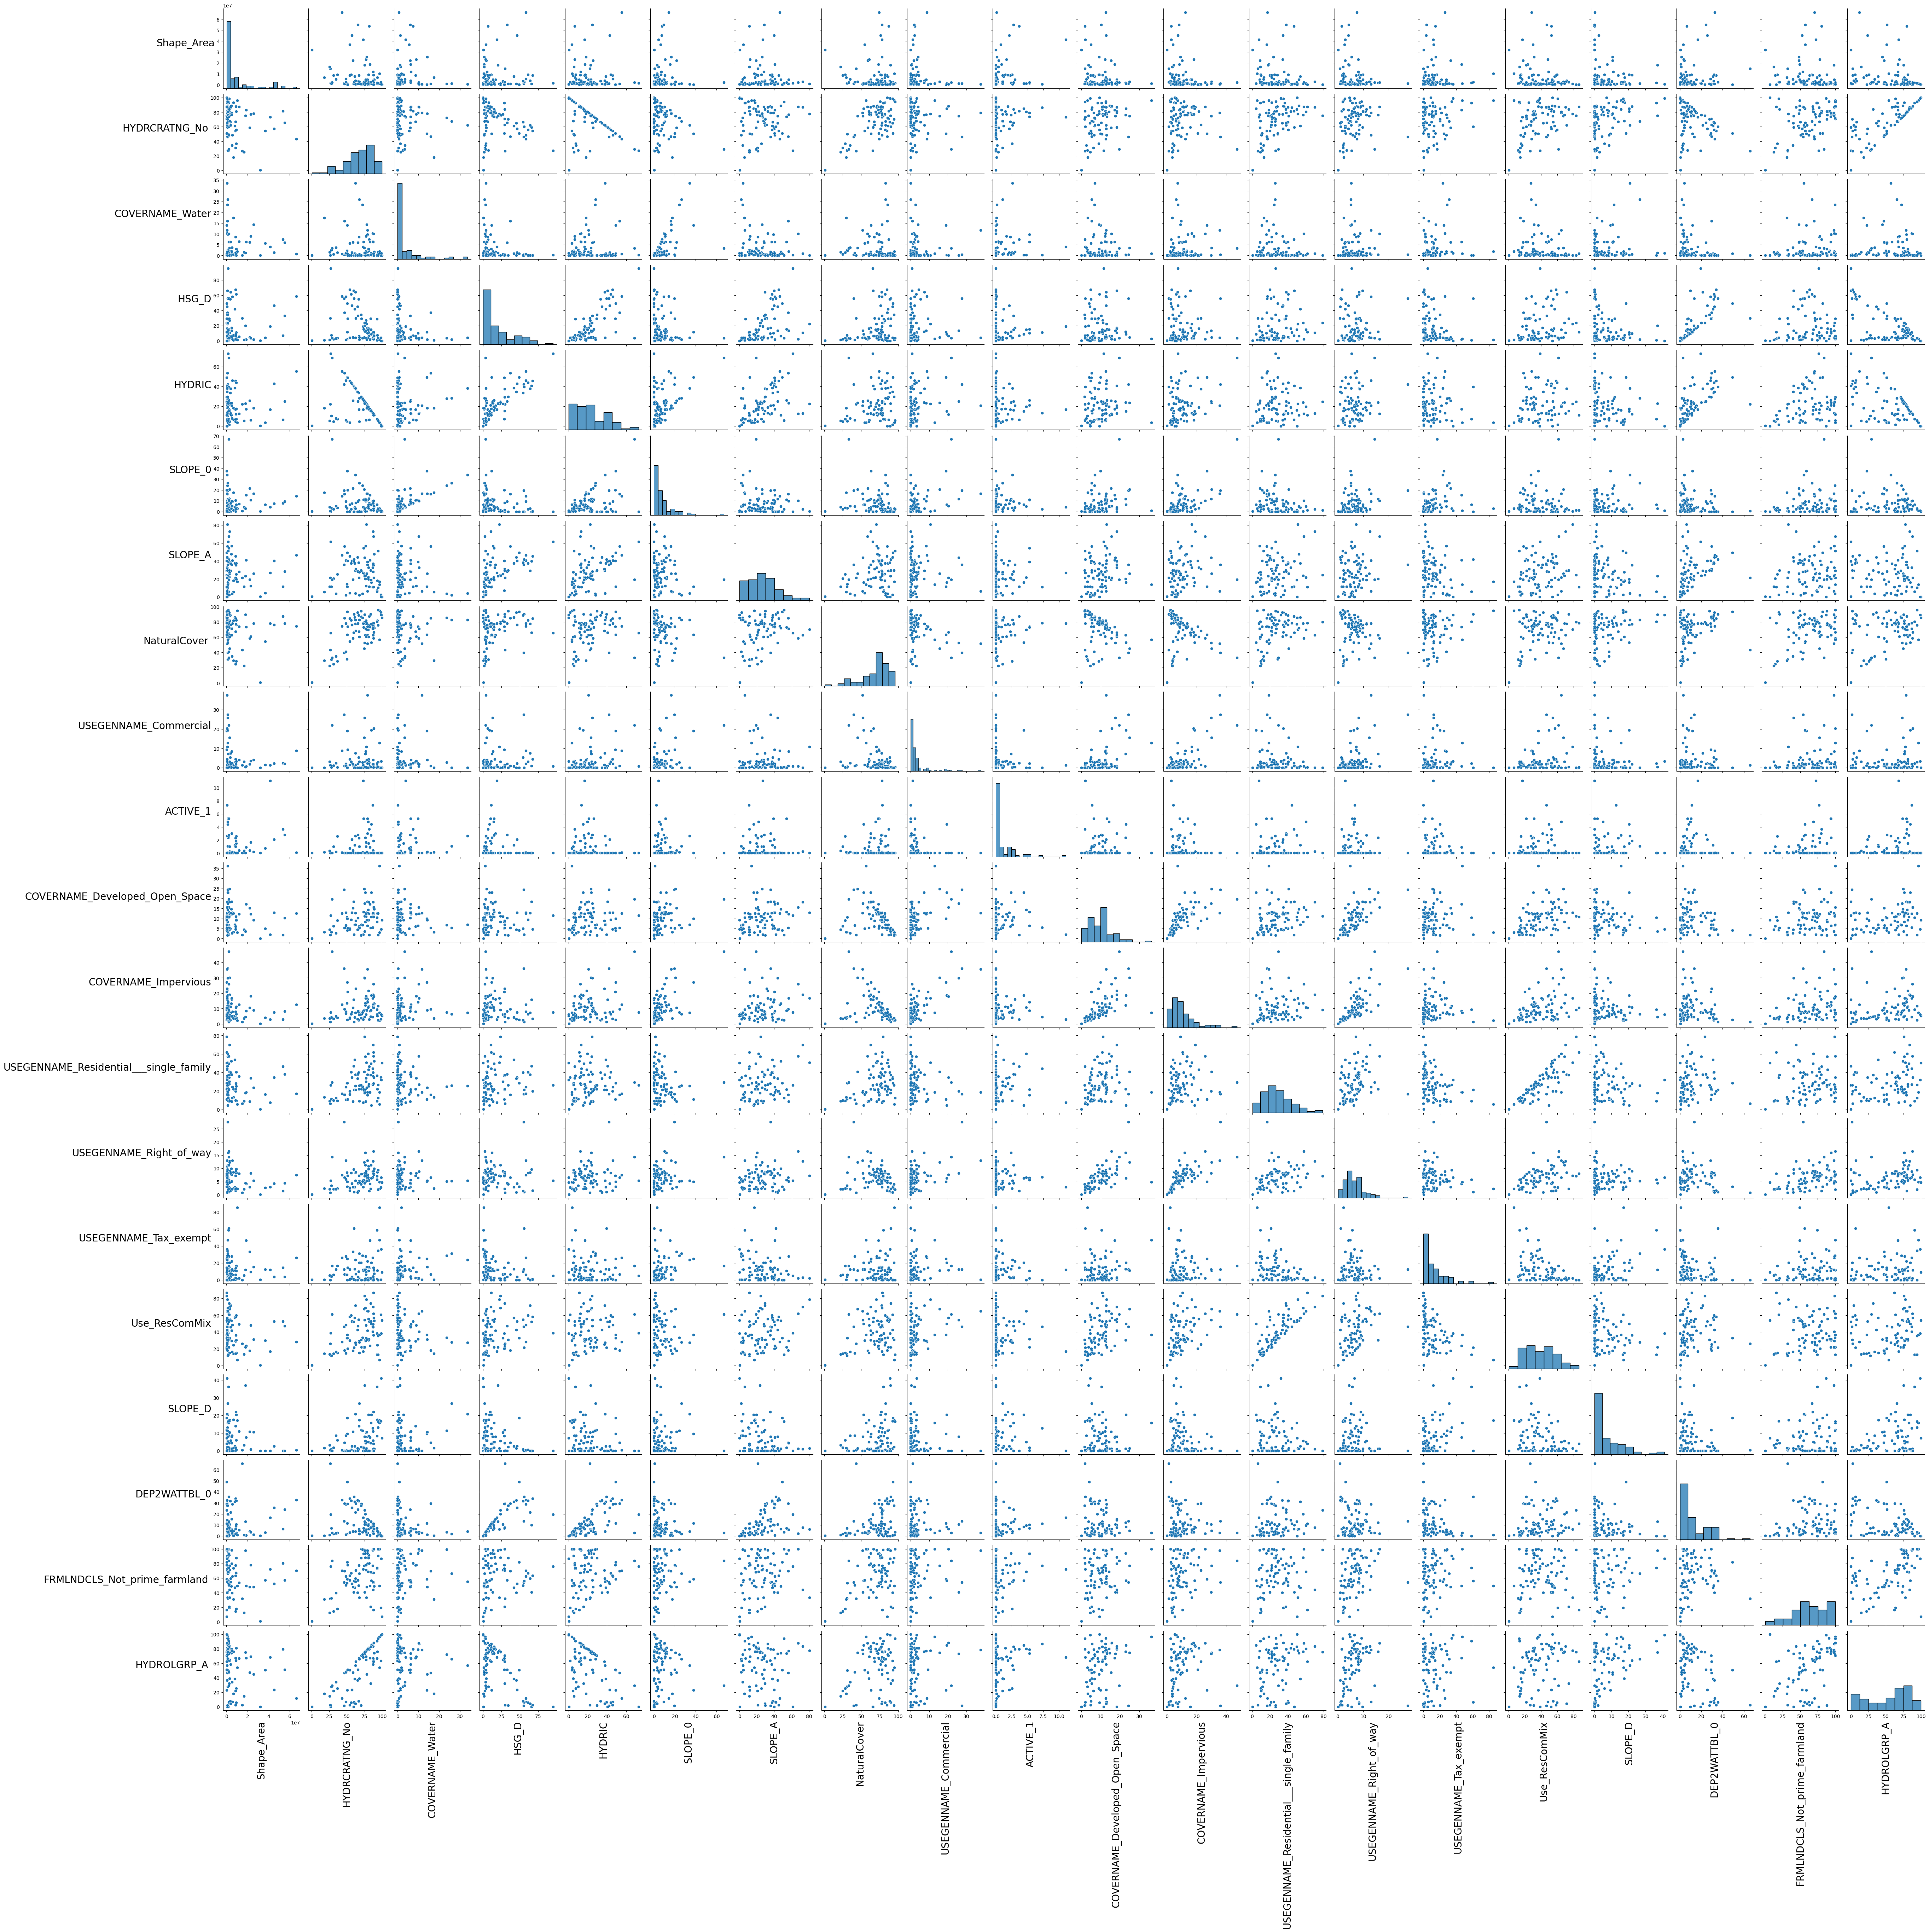

In [189]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(df[selected_watershed_features]) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

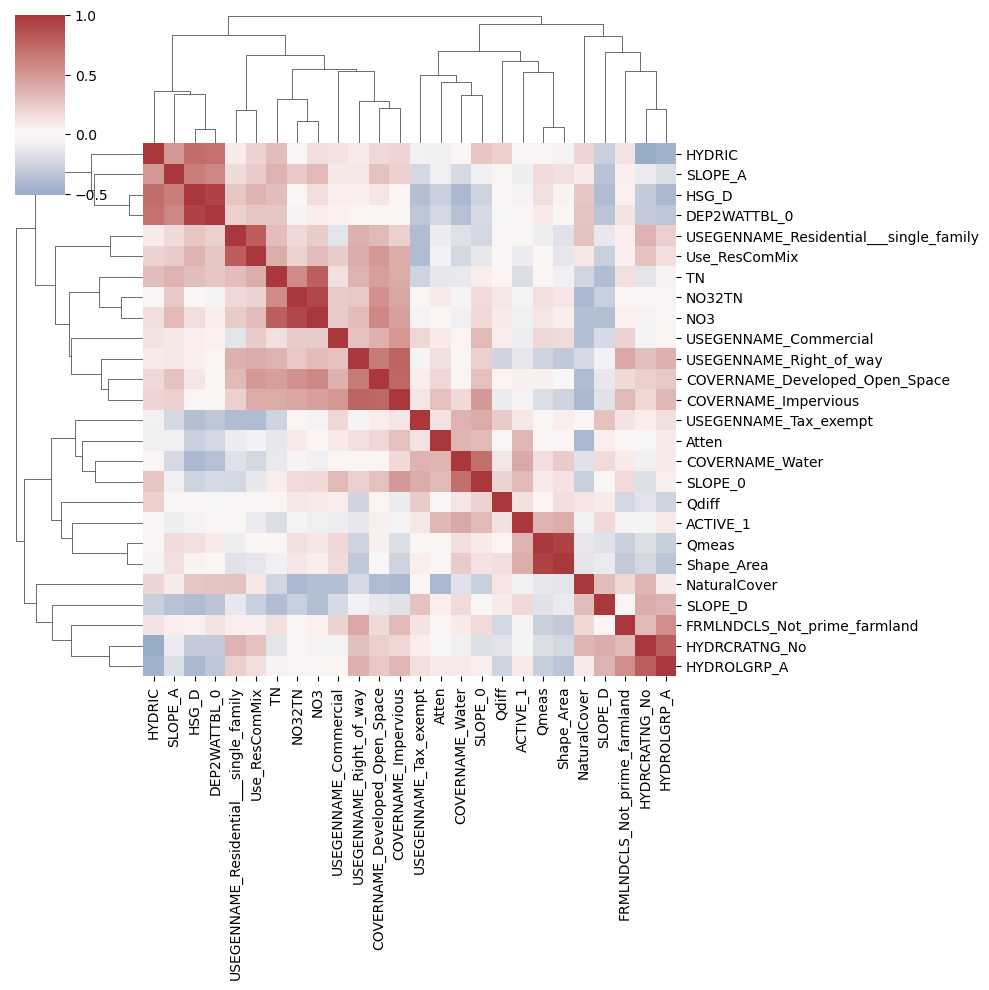

In [190]:
sns.clustermap(df[selected_monitoring_cols+selected_watershed_features].corr('spearman'),cmap="vlag", center=0)

## MODELING

### Linear Regression

In [191]:
# modeling
# Importing libraries for building linear regression model
#import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [192]:
# select Y
y_name = 'NO3'
_ = df
#_ = df[df['Atten']>-50] # remove outlier attenuation
_ = _[_[y_name].notna()]
#train_target = np.log(_[y_name]) # the untransformed models perform better than transformed ones
train_target = _[y_name]

# select Xs
#selected_features = selected
selected_features = selected_le5 + selected_gt5 + selected
#selected_cols = selected_cols
train_features_selected = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)][selected_features]
train_features_extended = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)]._get_numeric_data()
#train_features = np.log(train_features_selected + 1)
train_features = train_features_selected

In [193]:
# scale the X data
scaler = StandardScaler()
# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)
# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)
train_features_scaled.head()

LE5_Shape_Area  LE5_HYDRCRATNG_No  LE5_COVERNAME_Water  LE5_HSG_D  \
0        1.694124          -0.392446            -0.332147    0.36588   
1        1.694124          -0.392446            -0.332147    0.36588   
2        1.694124          -0.392446            -0.332147    0.36588   
3        1.694124          -0.392446            -0.332147    0.36588   
4        1.694124          -0.392446            -0.332147    0.36588   

   LE5_HYDRIC  LE5_SLOPE_0  LE5_SLOPE_A  LE5_NaturalCover  \
0    0.778098     0.222615     0.425691          0.424352   
1    0.778098     0.222615     0.425691          0.424352   
2    0.778098     0.222615     0.425691          0.424352   
3    0.778098     0.222615     0.425691          0.424352   
4    0.778098     0.222615     0.425691          0.424352   

   LE5_USEGENNAME_Commercial  LE5_ACTIVE_1  ...  \
0                  -0.293763      0.038428  ...   
1                  -0.293763      0.038428  ...   
2                  -0.293763      0.038428  ...   
3                  -0.293763      0.038428  ...   
4                  -0.293763      0.038428  ...   

   COVERNAME_Developed_Open_Space  COVERNAME_Impervious  \
0                        0.434887             -0.364183   
1                        0.434887             -0.364183   
2                        0.434887             -0.364183   
3                        0.434887             -0.364183   
4                        0.434887             -0.364183   

   USEGENNAME_Residential___single_family  USEGENNAME_Right_of_way  \
0                                0.395416                -0.539715   
1                                0.395416                -0.539715   
2                                0.395416                -0.539715   
3                                0.395416                -0.539715   
4                                0.395416                -0.539715   

   USEGENNAME_Tax_exempt  Use_ResComMix   SLOPE_D  DEP2WATTBL_0  \
0              -0.612499       0.703407 -0.533078      1.042406   
1              -0.612499       0.703407 -0.533078      1.042406   
2              -0.612499       0.703407 -0.533078      1.042406   
3              -0.612499       0.703407 -0.533078      1.042406   
4              -0.612499       0.703407 -0.533078      1.042406   

   FRMLNDCLS_Not_prime_farmland  HYDROLGRP_A  
0                     -0.434843    -1.025573  
1                     -0.434843    -1.025573  
2                     -0.434843    -1.025573  
3                     -0.434843    -1.025573  
4                     -0.434843    -1.025573  

[5 rows x 60 columns]

In [194]:
from sklearn.model_selection import train_test_split 
y = train_target
X = train_features_scaled
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=30)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
y = train_target
X = train_features_scaled
rg = Ridge(alpha=0.03)
ls = Lasso(alpha=0.02)
en = ElasticNet(alpha=0.03,l1_ratio=0.7)
lr = LinearRegression()

In [196]:
rg.fit(X_train, y_train)
ls.fit(X_train, y_train)
lr.fit(X_train, y_train)
en.fit(X_train, y_train)

ElasticNet(alpha=0.03, l1_ratio=0.7)

In [197]:
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Use L1 penalty
estimator = LassoCV(cv=10, normalize = True)
#estimator = ElasticNetCV(cv=10, normalize = True)

n_feats = int(np.floor(X.shape[0]/10/2))
# the optimal number of features based on AIC is 4
print("maximum number of features {}".format(n_feats))
if n_feats > X.shape[1]: 
    n_feats=X.shape[1]
# Set a minimum threshold of 0.25
m = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=n_feats)
m.fit(X, y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
# get variance inflation factor
vif = fn_get_vif(feature_name,X)
print(vif)

maximum number of features 4
Index(['LE5_USEGENNAME_Commercial', 'COVERNAME_Developed_Open_Space',
       'USEGENNAME_Residential___single_family', 'SLOPE_D'],
      dtype='object')
VIF is not of concern if less than 3
                                             VIF  Tolerance
LE5_USEGENNAME_Commercial               1.093074   0.914851
COVERNAME_Developed_Open_Space          1.139548   0.877541
USEGENNAME_Residential___single_family  1.114182   0.897520
SLOPE_D                                 1.058202   0.945000


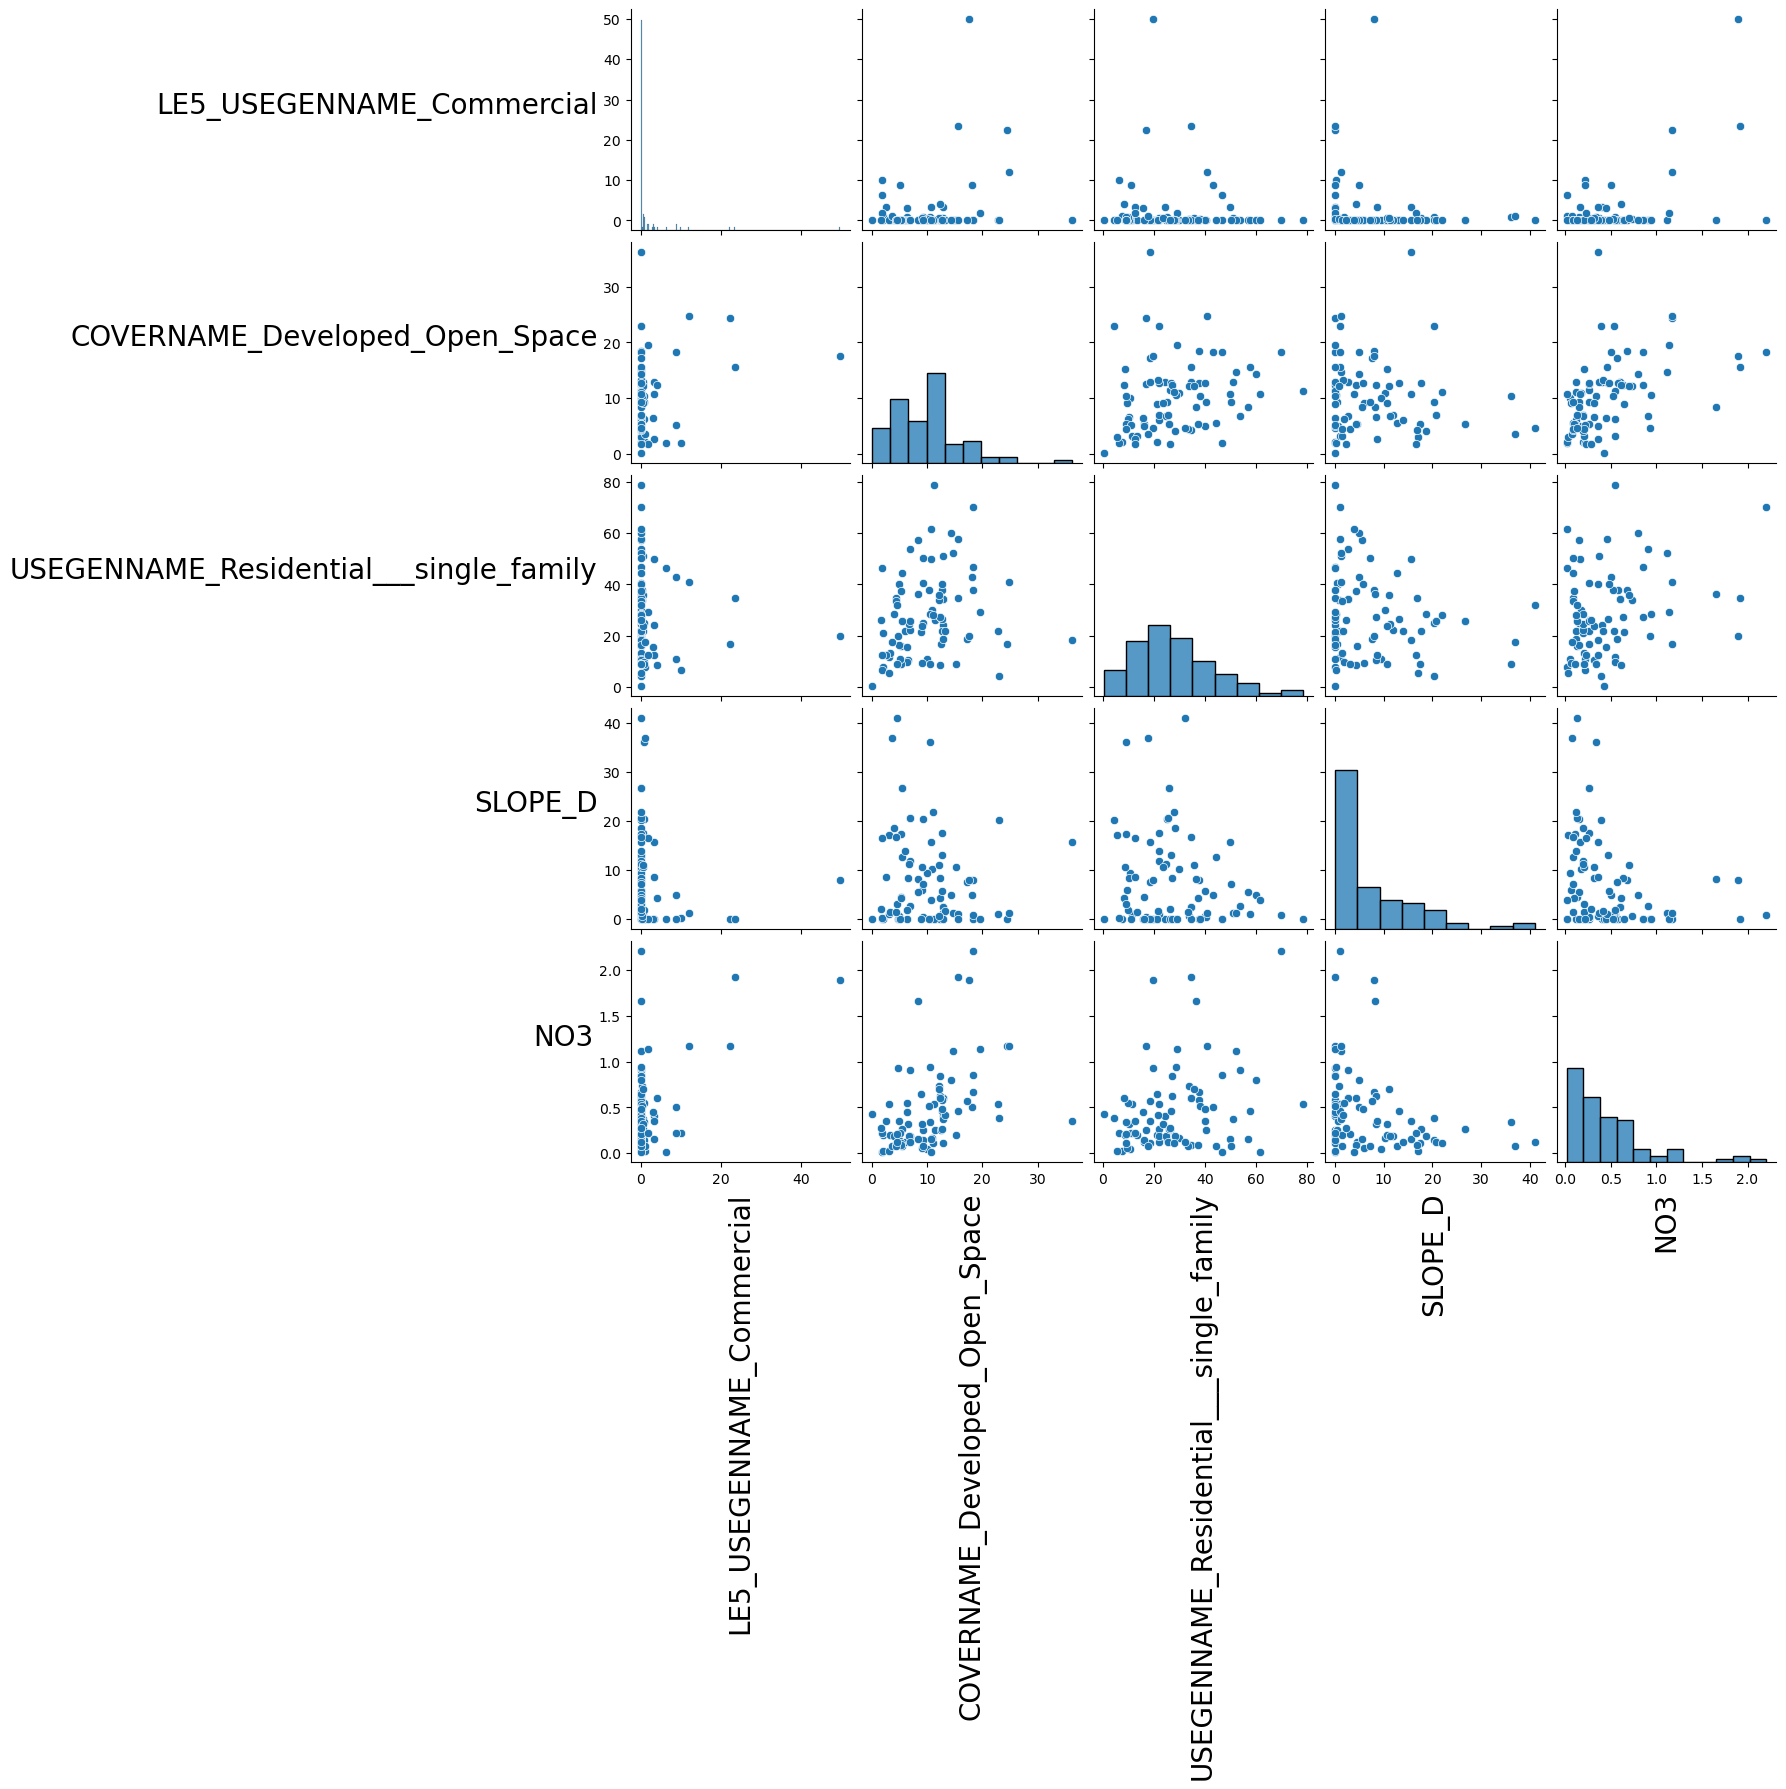

In [198]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(df[feature_name].join(df[y_name])) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

In [199]:
#import cvoxpt
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='Lasso')

display(ols_res_0.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO3   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     19.13
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.00e-11
Time:                        14:39:45   Log-Likelihood:                -22.341
No. Observations:                  90   AIC:                             54.68
Df Residuals:                      85   BIC:                             67.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.4554      0.034     13.538      0.000       0.389       0.522
LE5_USEGENNAME_Commercial                  0.1784      0.035      5.072      0.000       0.108       0.248
COVERNAME_Developed_Open_Space             0.1292      0.036      3.598      0.001       0.058       0.201
USEGENNAME_Residential___single_family     0.0876      0.036      2.467      0.016       0.017       0.158
SLOPE_D                                   -0.0865      0.035     -2.499      0.014      -0.155      -0.018
==============================================================================
Omnibus:                       43.013   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.432
Skew:                           1.592   Prob(JB):                     6.43e-30
Kurtosis:                       8.070   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
0.25 accuracy with a standard deviation of 0.34


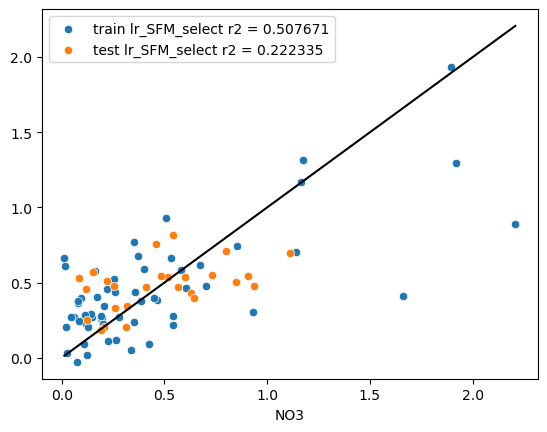

In [200]:
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_SFM_select')

Index(['LE5_USEGENNAME_Commercial', 'LE5_FRMLNDCLS_Not_prime_farmland',
       'NaturalCover', 'USEGENNAME_Residential___single_family'],
      dtype='object')
VIF is not of concern if less than 3
                                             VIF  Tolerance
LE5_USEGENNAME_Commercial               1.047878   0.954309
LE5_FRMLNDCLS_Not_prime_farmland        1.164445   0.858778
NaturalCover                            1.285727   0.777770
USEGENNAME_Residential___single_family  1.145267   0.873159
running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
0.25 accuracy with a standard deviation of 0.43


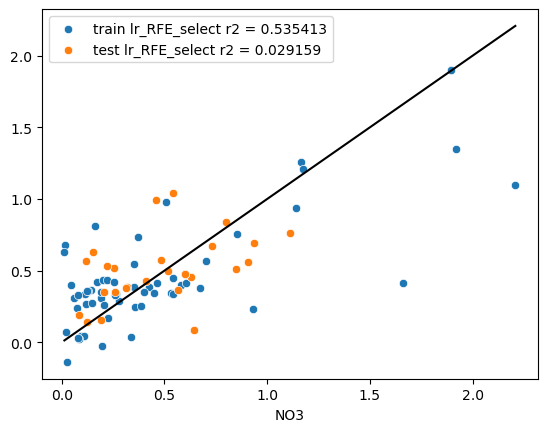

In [201]:
# recursive feature elimination
# THIS TAKES A LONG TIME TO RUN
m = RFE(estimator,n_features_to_select=n_feats)
m.fit(X,y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
print(fn_get_vif(feature_name,X))
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_RFE_select')

Index(['LE5_USEGENNAME_Commercial', 'LE5_FRMLNDCLS_Not_prime_farmland',
       'NaturalCover', 'USEGENNAME_Residential___single_family'],
      dtype='object')
VIF is not of concern if less than 3
                                             VIF  Tolerance
LE5_USEGENNAME_Commercial               1.047878   0.954309
LE5_FRMLNDCLS_Not_prime_farmland        1.164445   0.858778
NaturalCover                            1.285727   0.777770
USEGENNAME_Residential___single_family  1.145267   0.873159
running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
0.25 accuracy with a standard deviation of 0.43


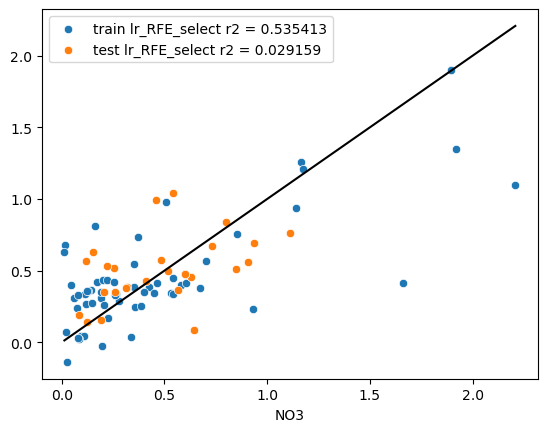

In [202]:
# forward feature selection
from sklearn.feature_selection import SequentialFeatureSelector
SequentialFeatureSelector(estimator, n_features_to_select=n_feats)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
vif = fn_get_vif(feature_name,X)
print(vif)
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_RFE_select')

In [203]:
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns
from functions import *

# get variance inflation factor
vif = fn_get_vif(feature_name,train_features_scaled_select)
print(vif)
# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='sqrt_lasso')

display(ols_res_0.summary())

VIF is not of concern if less than 3
                                             VIF  Tolerance
LE5_USEGENNAME_Commercial               1.047878   0.954309
LE5_FRMLNDCLS_Not_prime_farmland        1.164445   0.858778
NaturalCover                            1.285727   0.777770
USEGENNAME_Residential___single_family  1.145267   0.873159


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO3   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     19.41
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.26e-11
Time:                        14:40:17   Log-Likelihood:                -22.031
No. Observations:                  90   AIC:                             54.06
Df Residuals:                      85   BIC:                             66.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.4554      0.034     13.585      0.000       0.389       0.522
LE5_USEGENNAME_Commercial                  0.1916      0.034      5.584      0.000       0.123       0.260
LE5_FRMLNDCLS_Not_prime_farmland           0.1155      0.036      3.194      0.002       0.044       0.187
NaturalCover                              -0.1566      0.038     -4.119      0.000      -0.232      -0.081
USEGENNAME_Residential___single_family     0.1623      0.036      4.523      0.000       0.091       0.234
==============================================================================
Omnibus:                       33.425   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.223
Skew:                           1.273   Prob(JB):                     1.89e-19
Kurtosis:                       7.064   Cond. No.                         1.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

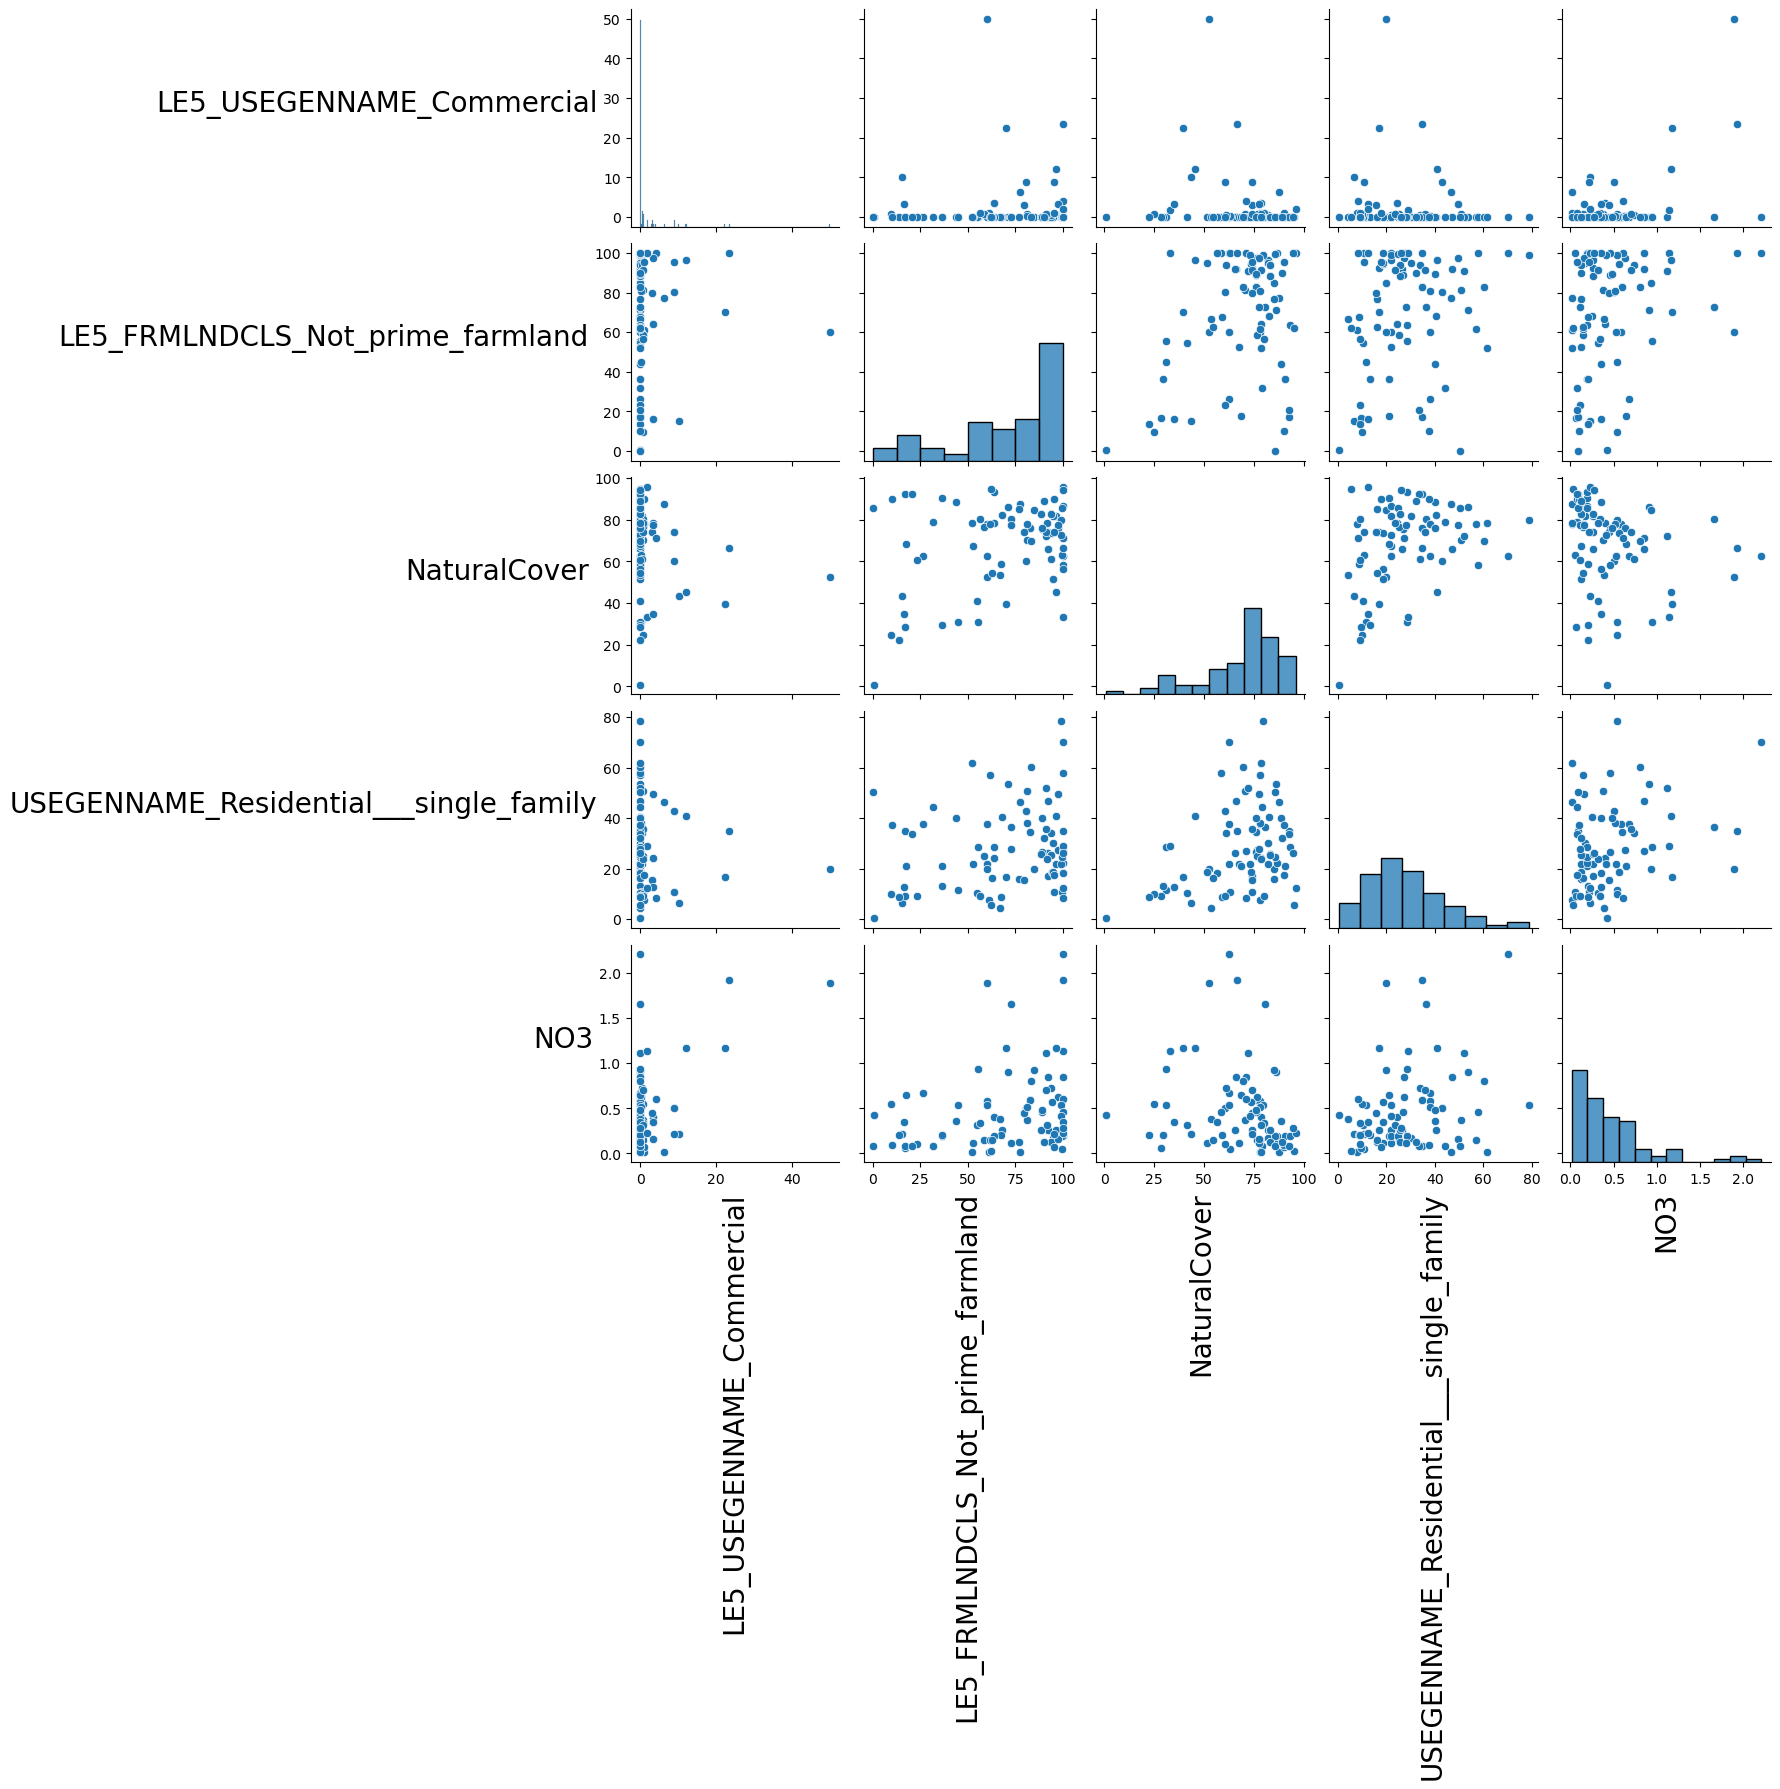

In [204]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(df[feature_name].join(df[y_name])) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

In [205]:
# CROSS VALIDATATION FOR MODEL HYPERPARAMETER TUNING

In [206]:
from sklearn.linear_model import LassoCV
import time
from sklearn.pipeline import make_pipeline
start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

0.024330971411646456


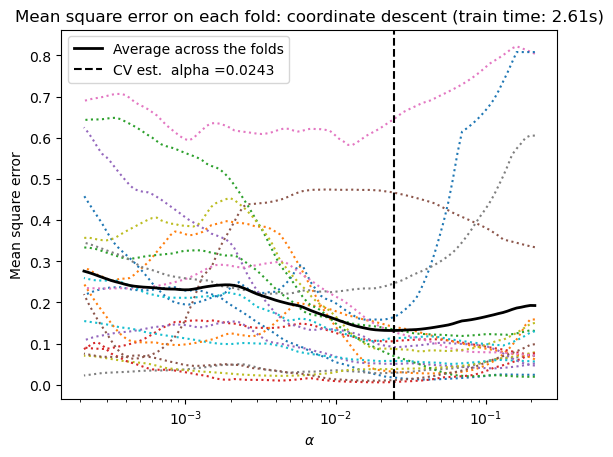

In [207]:
import matplotlib.pyplot as plt

lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="CV est.  alpha ="+str(round(lasso.alpha_,4)))
print(lasso.alpha_)
#plt.ylim()
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
0.27 accuracy with a standard deviation of 0.30


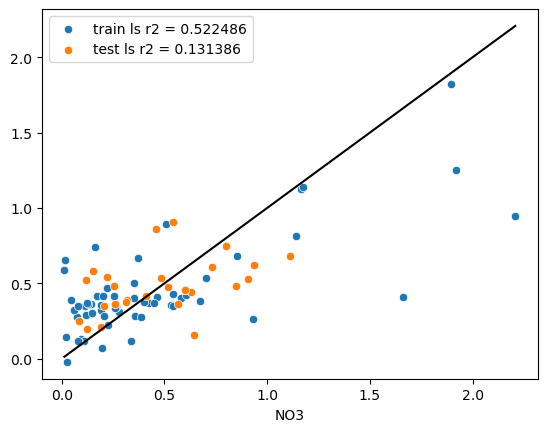

In [208]:
# fit the model with alpha
ls = Lasso(alpha=lasso.alpha_)
ls.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(ls,X[feature_name],y)
fn_plot_obs_vs_pred(ls,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls')

### Tree and Ensemble Learning
Here I test methods of regression trees for explaining variation in NOx

I use [SHAP - SHapley Addative exPlanations](https://shap.readthedocs.io/en/latest/index.html) to explain the impact of variables on NOx values

Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. Advances in neural information processing systems, 30.

In [209]:
# select Y
y_name = 'NO3'
_ = df
#_ = df[df['Atten']>-50] # remove outlier attenuation
_ = _[_[y_name].notna()]
#train_target = np.log(_[y_name])
train_target = _[y_name]
# select Xs
selected_features = selected
#selected_features = selected_le5 + selected_gt5 + selected
#selected_cols = selected_cols
train_features_selected = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)][selected_features]
train_features_extended = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)]._get_numeric_data()
#train_features = np.log(train_features_selected + 1)
train_features = train_features_selected

In [210]:
# scale the X data
scaler = StandardScaler()
# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)
# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)
train_features_scaled.head()

Shape_Area  HYDRCRATNG_No  COVERNAME_Water     HSG_D    HYDRIC   SLOPE_0  \
0    2.358451      -0.518085        -0.390442  1.276314  1.216053 -0.080809   
1    2.358451      -0.518085        -0.390442  1.276314  1.216053 -0.080809   
2    2.358451      -0.518085        -0.390442  1.276314  1.216053 -0.080809   
3    2.358451      -0.518085        -0.390442  1.276314  1.216053 -0.080809   
4    2.358451      -0.518085        -0.390442  1.276314  1.216053 -0.080809   

    SLOPE_A  NaturalCover  USEGENNAME_Commercial  ACTIVE_1  \
0  0.744286      0.354268              -0.254114  0.604338   
1  0.744286      0.354268              -0.254114  0.604338   
2  0.744286      0.354268              -0.254114  0.604338   
3  0.744286      0.354268              -0.254114  0.604338   
4  0.744286      0.354268              -0.254114  0.604338   

   COVERNAME_Developed_Open_Space  COVERNAME_Impervious  \
0                        0.434887             -0.364183   
1                        0.434887             -0.364183   
2                        0.434887             -0.364183   
3                        0.434887             -0.364183   
4                        0.434887             -0.364183   

   USEGENNAME_Residential___single_family  USEGENNAME_Right_of_way  \
0                                0.395416                -0.539715   
1                                0.395416                -0.539715   
2                                0.395416                -0.539715   
3                                0.395416                -0.539715   
4                                0.395416                -0.539715   

   USEGENNAME_Tax_exempt  Use_ResComMix   SLOPE_D  DEP2WATTBL_0  \
0              -0.612499       0.703407 -0.533078      1.042406   
1              -0.612499       0.703407 -0.533078      1.042406   
2              -0.612499       0.703407 -0.533078      1.042406   
3              -0.612499       0.703407 -0.533078      1.042406   
4              -0.612499       0.703407 -0.533078      1.042406   

   FRMLNDCLS_Not_prime_farmland  HYDROLGRP_A  
0                     -0.434843    -1.025573  
1                     -0.434843    -1.025573  
2                     -0.434843    -1.025573  
3                     -0.434843    -1.025573  
4                     -0.434843    -1.025573

In [211]:
from sklearn.model_selection import train_test_split 
y = train_target
X = train_features_scaled
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=30)

running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
-0.22 accuracy with a standard deviation of 0.77


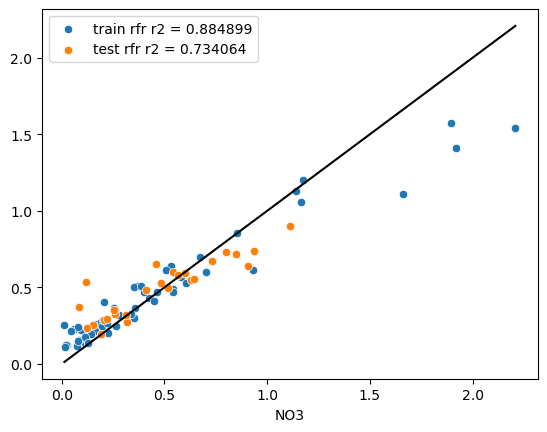

In [212]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X, y)
fn_sklearn_cross_val_scores(rfr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr,X_test,X_train,y_test,y_train,'rfr')

Elapsed time to compute the importances: 0.008 seconds


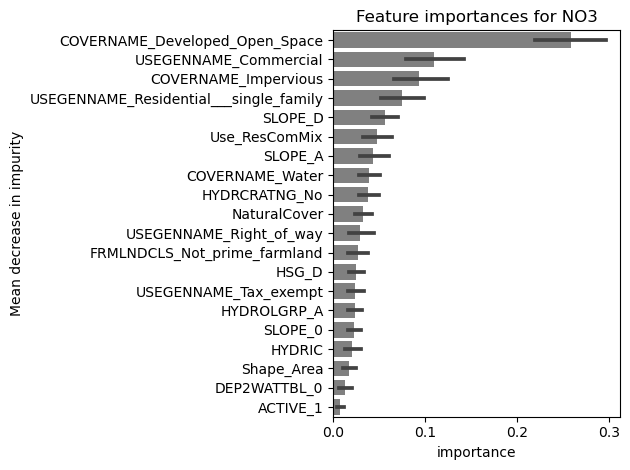

In [213]:
df_importance = fn_ensemble_feature_importance_plot(rfr,X.columns,y_name)

In [214]:
def fn_shap_model_explainer(
    m,# fitted model 
    X,# array of explanatory variables
    fig_prefix="rfr",
    # save figures to png
    save_figs = True
    ):
    %matplotlib auto
    '''
    # use this line to install shap if needed
    !pip install shap
    # https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html
    '''
    import shap
    # Fits the explainer
    explainer = shap.Explainer(m, X) # Calculates the SHAP values - It takes some time
    shap_values = explainer(X)
    
    # Plot beeswarm
    shap.plots.beeswarm(shap_values,max_display=10)
    plt.savefig('{}_shap_beeswarm.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
    plt.close()
    
    # Plot heatmap
    shap.plots.heatmap(shap_values,instance_order=shap_values.sum(1),max_display=10,show=False)
    plt.savefig('{}_shap_heatmap.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
    plt.close()
    
    # Plot waterfall
    shap.plots.waterfall(shap_values[0])
    plt.savefig('{}_shap_waterfall.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
    plt.close()
    %matplotlib inline

In [215]:
# Fits the explainer
import shap
m = rfr
fig_prefix = "rfr"
explainer = shap.Explainer(m, X) # Calculates the SHAP values - It takes some time
shap_values = explainer(X)

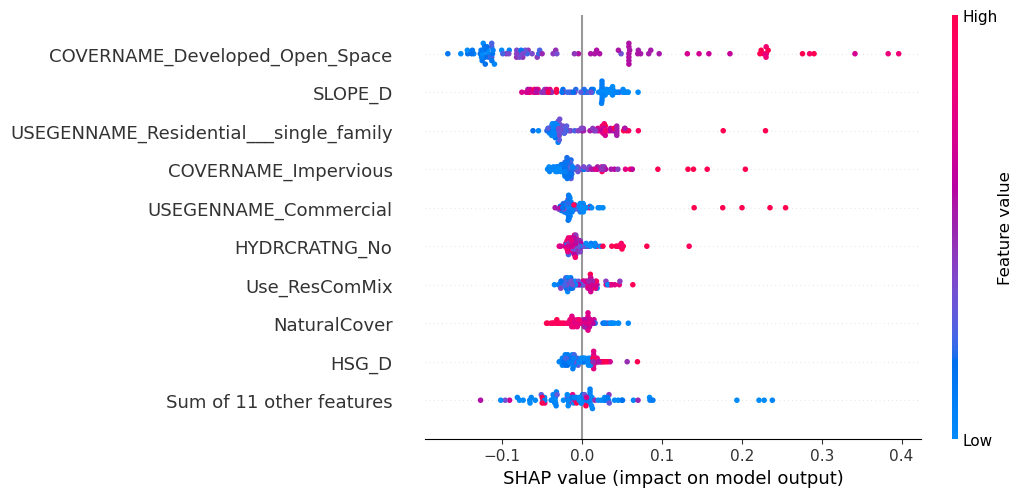

In [216]:
# Plot beeswarm
shap.plots.beeswarm(shap_values,max_display=10)
plt.savefig('{}_shap_beeswarm.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
plt.close()

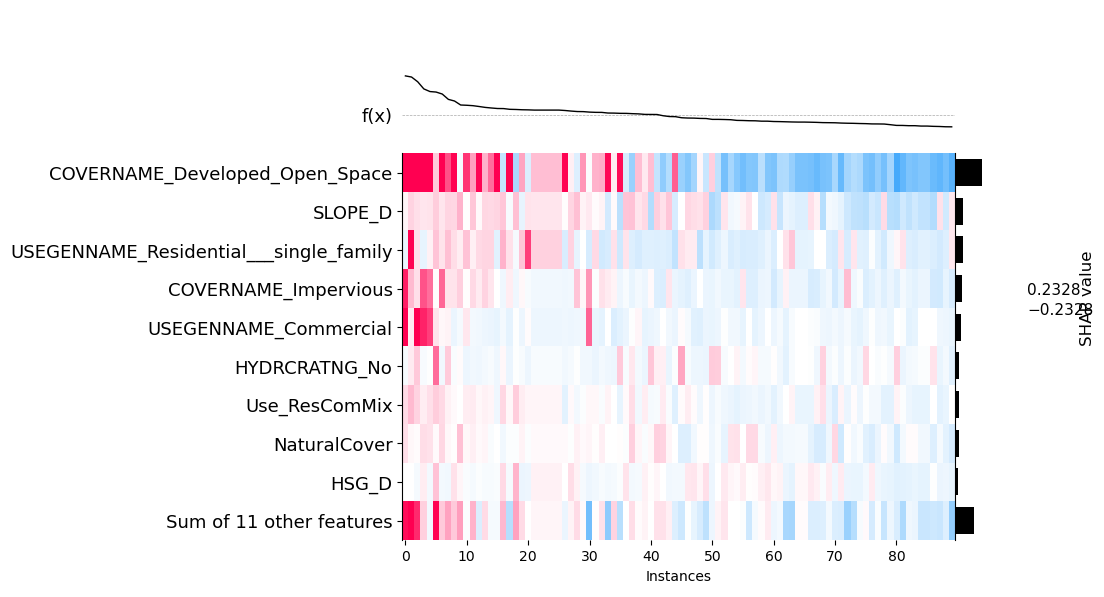

In [217]:
# Plot heatmap
shap.plots.heatmap(shap_values,instance_order=shap_values.sum(1),max_display=10)
plt.savefig('{}_shap_heatmap.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
plt.close()

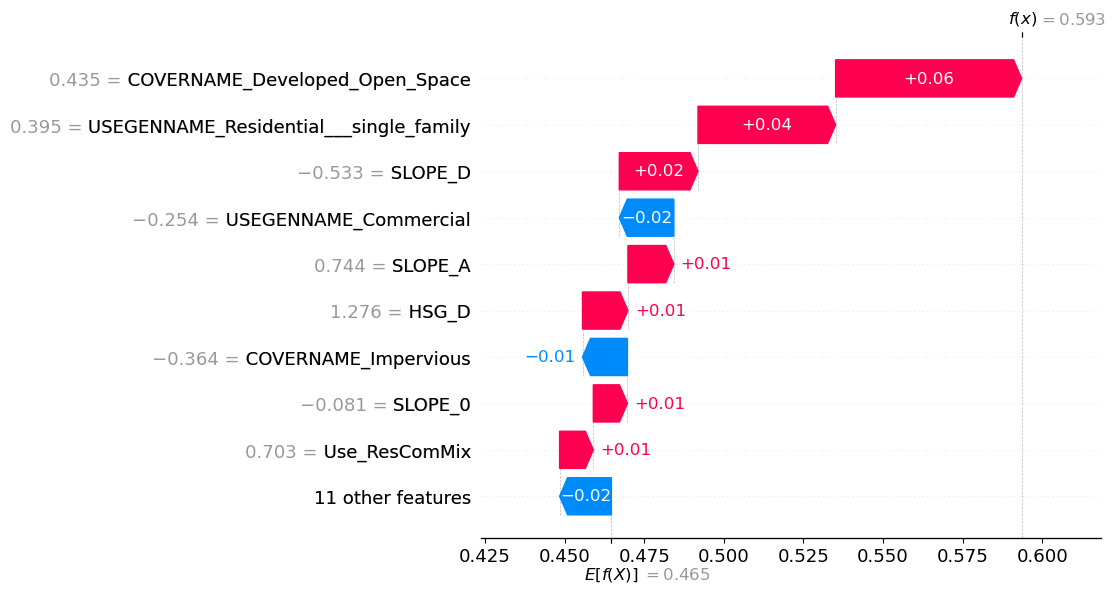

In [218]:
# Plot waterfall
shap.plots.waterfall(shap_values[0])
plt.savefig('{}_shap_waterfall.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
plt.close()

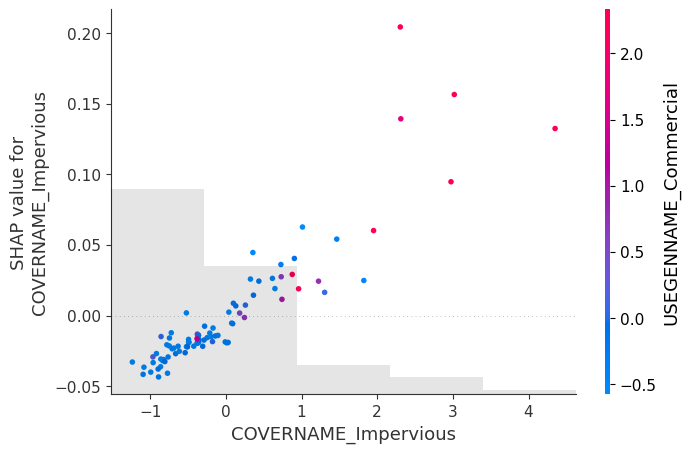

In [219]:
shap.plots.scatter(shap_values[:,"COVERNAME_Impervious"], color=shap_values)

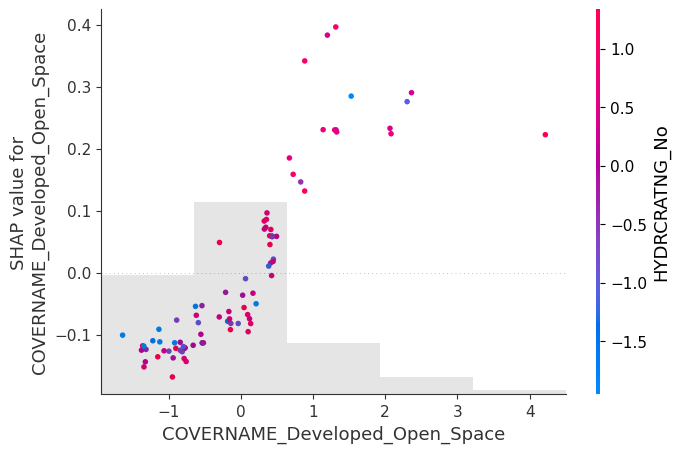

In [220]:
shap.plots.scatter(shap_values[:,"COVERNAME_Developed_Open_Space"],color=shap_values)

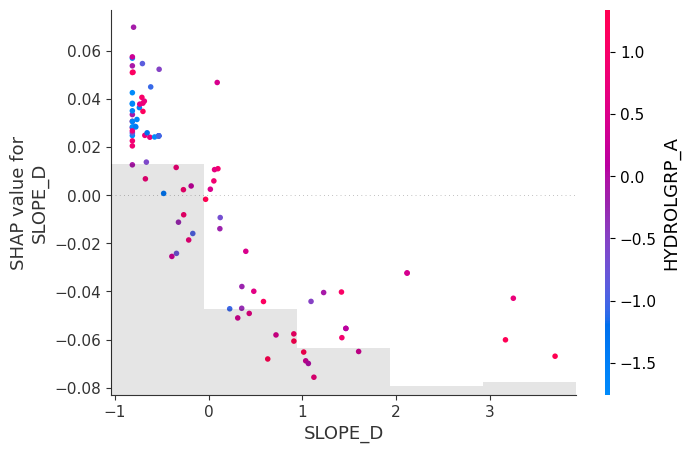

In [221]:
shap.plots.scatter(shap_values[:,"SLOPE_D"], color=shap_values)

running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
0.13 accuracy with a standard deviation of 0.16


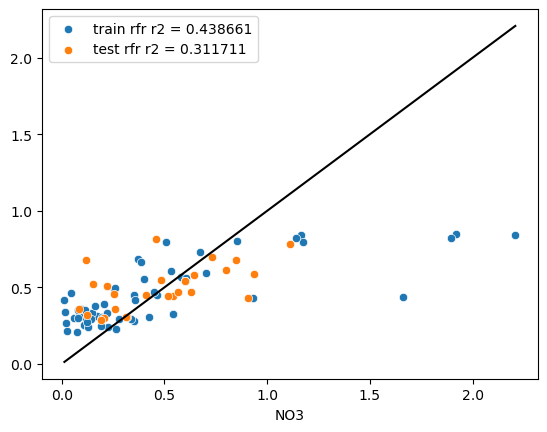

In [222]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_features=4,max_depth=3,min_samples_leaf=10,n_estimators=200)
rfr.fit(X, y)
fn_sklearn_cross_val_scores(rfr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr,X_test,X_train,y_test,y_train,'rfr')

Elapsed time to compute the importances: 0.016 seconds


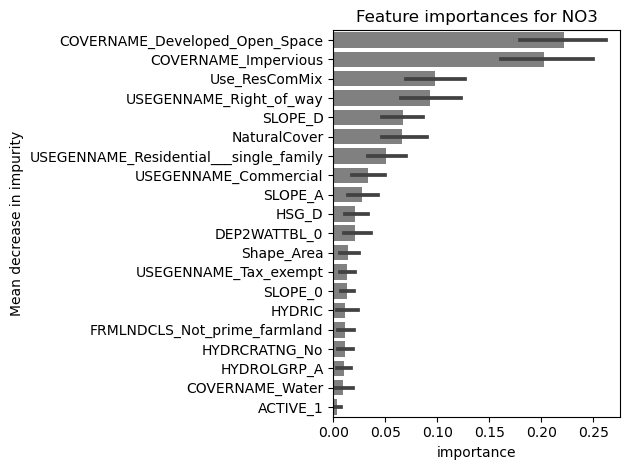

In [223]:
df_importance = fn_ensemble_feature_importance_plot(rfr,X.columns,y_name)

In [224]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,3,10]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 8, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nRandom Search Grid:\n")
pprint(random_grid)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Random Search Grid:

{'bootstrap': [True, False],
 'max_depth': [1, 3, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 6],
 'min_samples_split': [4, 8, 16],
 'n_estimators': [2, 46, 90, 134, 178, 223, 267, 311, 355, 400]}


In [225]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [226]:
# Fit the random search model
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=3, max_features=4,
                                                   min_samples_leaf=10,
                                                   n_estimators=200),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 6],
                                        'min_samples_split': [4, 8, 16],
                                        'n_estimators': [2, 46, 90, 134, 178,
                                                         223, 267, 311, 355,
                                                         400]},
                   random_state=42, verbose=2)

{'n_estimators': 46, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
running cross validation with ShuffleSplit: n_splits=18, test_size=0.3, rand_state = 0
0.12 accuracy with a standard deviation of 0.20


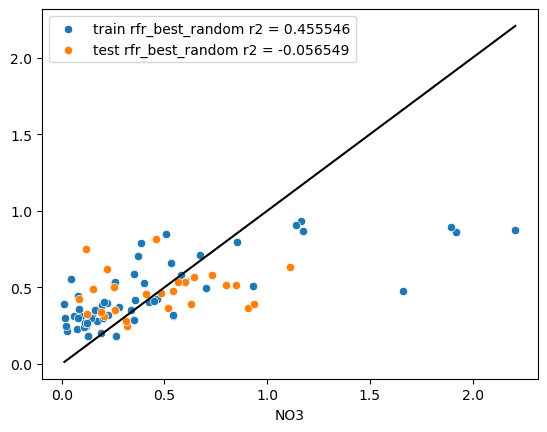

In [227]:
# Fit the random search model
print(rfr_random.best_params_)

# save the best random trianed model
rfr_best_random = rfr_random.best_estimator_
fn_sklearn_cross_val_scores(rfr_best_random,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr_best_random,X_test,X_train,y_test,y_train,'rfr_best_random')

In [228]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,6,12],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [8,10,12],
    'n_estimators': [i for i in range(150,250,by=5)]}
# Instantiate the grid search model
rfr_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
rfr_grid.fit(X_train, y_train)

TypeError: range() takes no keyword arguments

In [ ]:
# Fit the random search model
print(rfr_grid.best_params_)

# pull out best estimator
rfr_best_grid = rfr_grid.best_estimator_
fn_sklearn_cross_val_scores(rfr_best_grid,X,y)

# plot obs vs fitted
fn_plot_obs_vs_pred(rfr_best_grid,X_test,X_train,y_test,y_train,'rfr_best_grid')

In [ ]:
df_importance = fn_ensemble_feature_importance_plot(rfr_best_grid,X.columns,y_name)

In [ ]:
feature_name = df_importance.varname[:10]
ls_select = estimator.fit(X_train[feature_name],y_train)

fn_plot_obs_vs_pred(ls_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls_select')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# define model and select hyperparameters
gbr = GradientBoostingRegressor(min_samples_split=20,min_samples_leaf=20,max_depth=2,learning_rate=0.05,random_state=1)

# fit model to training data
gbr.fit(X_train,y_train)
fn_sklearn_cross_val_scores(gbr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(gbr,X_test,X_train,y_test,y_train,'gbr')

In [ ]:
## DECISION TREE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor()

ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=2), n_estimators=1000, random_state=rng
)
ada.fit(X_train,y_train)
fn_plot_obs_vs_pred(ada,X_test,X_train,y_test,y_train,'ada')

In [ ]:
fn_sklearn_cross_val_scores(ada,X,y)

In [ ]:
df_importance = fn_ensemble_feature_importance_plot(ada,X.columns,y_name)

In [ ]:
feature_name = df_importance.varname[:10]
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X,y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls_select')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

# LinearRegression on PCA
pcr = make_pipeline(StandardScaler(), PCA(n_components=n_feats), ls)
pcr.fit(X_train, y_train)
fn_sklearn_cross_val_scores(pcr,X,y)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

# Partial Least Squares
pls = PLSRegression(n_components=n_feats)
pls.fit(X_train[selected_features], y_train)
fn_sklearn_cross_val_scores(pls,X,y)

In [ ]:
fn_plot_obs_vs_pred(pcr,X_test,X_train,y_test,y_train,'pcr')

In [ ]:
fn_plot_obs_vs_pred(pls,X_test[selected_features],X_train[selected_features],y_test,y_train,'pls')

# Appendix

## Unused code snippets

In [ ]:
# Creating histograms
vars = ["NOx2TN","TN","NOx",'Atten','Qdiff','Qmeas']
#var = vars[0]
#fig, axes = plt.subplots(2, 3, figsize = (20, 6))
for var in vars:
    sns.histplot(x=var,data=df_monitoring_avg)
    plt.show()

In [ ]:
sns.scatterplot(x='Use_ResComMix',y='NO3 (mg/L)',data=df)